# General notebook for visualizing scripts and scratches results

Compatible scripts:

DQN:
* script40


In [178]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch

def db_to_power(x):
    return 10**(x/10)
# %matplotlib inline

# Testing data

In [179]:
# filepath = "D:\Dev\sys-simulator-2\data\dql\script47\\20210128-191421\log.pickle"
filepath = """D:\Dev\sys-simulator-2\data\dql\script47\\20210204-194438\log.pickle"""
# FILE_NAME = 'script47\\20210128-195152\\log'
# filepath = f'D:\\Dev\\sys-simulator-2\\data\\dql\\{FILE_NAME}.pickle'
# filepath = 'D:\\Dev\\sys-simulator-2\\data\\a3c\\scratch7.pickle'
# filepath = f'D:\\Dev\\sys-simulator-2\\data\\a2c\\{FILE_NAME}.pickle'
file = open(filepath, 'rb')
data = pickle.load(file)
file.close()

## MUE success rate

Text(0.5, 0, 'Number of D2D pairs')

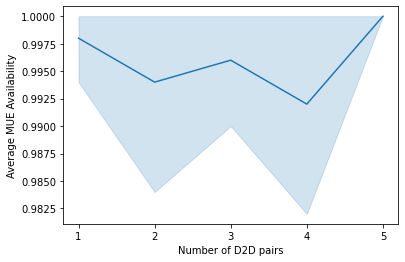

In [180]:
mue_success_rate = np.array(data['mue_success_rate'])
aux = np.ones((mue_success_rate.shape[0], np.prod(mue_success_rate.shape[1:])))
for i in range(len(aux)):
    aux[i] *= i+1
n_d2d = aux.reshape(-1)
aux2 = mue_success_rate.reshape(-1)
# dataframe
df = pd.DataFrame({'success': aux2, 'n_d2d': n_d2d})
# plot
sns.lineplot(x="n_d2d", y="success", data=df)
x_ticks = df['n_d2d'].unique()
x_ticks.sort()
plt.xticks(x_ticks)
plt.ylabel('Average MUE Availability')
plt.xlabel('Number of D2D pairs')

## MUE Spectral Efficiencies

In [181]:
data['mue_sinr_threshold']

6

Text(0.5, 0, 'Number of D2D pairs')

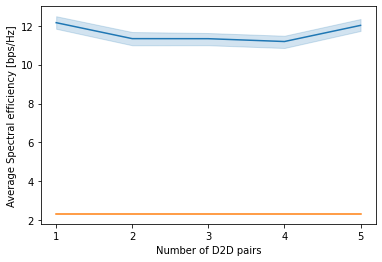

In [182]:
mue_speffs = np.array(data['mue_speffs'])
aux = np.ones((mue_speffs.shape[0], np.prod(mue_speffs.shape[1:])))
for i in range(len(aux)):
    aux[i] *= i+1
n_d2d = aux.reshape(-1)
aux2 = mue_speffs.reshape(-1)

df = pd.DataFrame({'speffs': aux2, 'n_d2d': n_d2d})
df['dummy'] = 'Spectral Efficiency'

speff_threshold = np.log2(1 + db_to_power(data['mue_sinr_threshold'])) 
baseline = speff_threshold * np.ones(mue_speffs.shape[0])

sns.lineplot(x="n_d2d", y="speffs",data=df)

plt.plot(x_ticks, baseline)
x_ticks = df['n_d2d'].unique()
x_ticks.sort()
plt.xticks(x_ticks)
plt.ylabel('Average Spectral efficiency [bps/Hz]')
plt.xlabel('Number of D2D pairs')

In [183]:
mask = mue_success_rate[4] != 1
mue_success_rate[4][mask]

array([], dtype=float64)

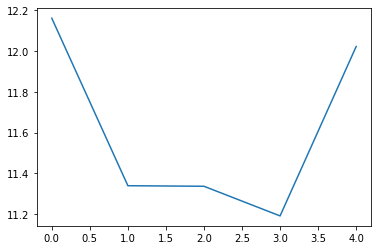

In [184]:
avgs = np.mean(mue_speffs, axis=(1,2))
plt.plot(avgs)

In [185]:
std_mue_success_rate = np.std(mue_success_rate, axis=1).tolist()
mean_mue_speffs = np.mean(mue_success_rate, axis=1).tolist()

## D2D Summed Spectral Efficiencies

Text(0.5, 0, 'Number of D2D pairs')

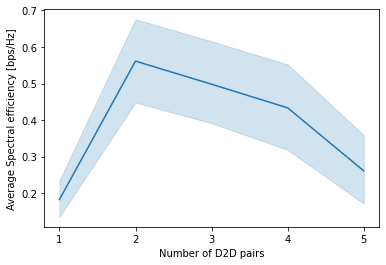

In [186]:
d2d_speffs = np.array(data['d2d_speffs'])
aux = np.ones((d2d_speffs.shape[0], np.prod(d2d_speffs.shape[1:])))
for i in range(len(aux)):
    aux[i] *= i+1
n_d2d = aux.reshape(-1)
aux2 = d2d_speffs.reshape(-1)
# dataframe
df = pd.DataFrame({'speff': aux2, 'n_d2d': n_d2d})
# plot
sns.lineplot(x="n_d2d", y="speff",data=df)
x_ticks = df['n_d2d'].unique()
x_ticks.sort()
plt.xticks(x_ticks)
plt.ylabel('Average Spectral efficiency [bps/Hz]')
plt.xlabel('Number of D2D pairs')

[0.18267065 0.56140203 0.49810914 0.43348072 0.2610282 ]


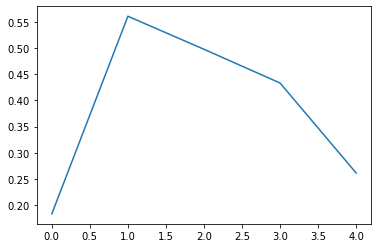

In [187]:
avgs = np.mean(d2d_speffs, axis=(1,2))
print(avgs)
plt.plot(avgs)

## Training data

## Training evaluation rewards

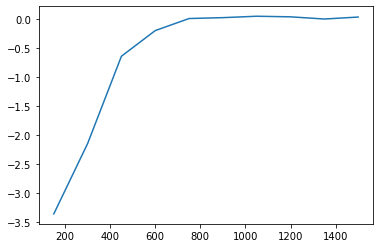

In [188]:
r = data['training_rewards']
t = [(i+1) * data['eval_every'] for i in range(len(r))]
plt.plot(t,r)

## Training evaluation D2D speffs

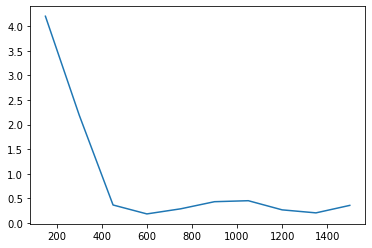

In [189]:
d_speffs = data['training_d2d_speffs']
plt.plot(t, d_speffs)

## Training evaluation MUE speffs

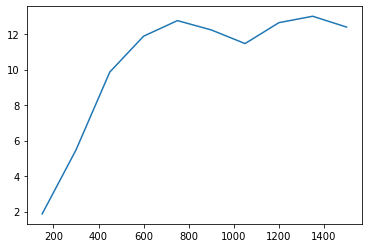

In [190]:
m_speffs = data['training_mue_speffs']
plt.plot(t, m_speffs)